In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point, Polygon
from datetime import datetime
from colour import Color

In [2]:
# Read in prepped csv files
lis = pd.read_csv('./data/prepped/lis.csv')
cal = pd.read_csv('./data/raw/calendar.csv')

In [3]:
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
# Create is_available column to code available into binary 0 or 1
cal['is_available'] = np.where(cal['available'] == 't', 1, 0)

In [5]:
# Create datetime column to convert date strings into type datetime
cal['datetime'] = cal.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [6]:
cal.head()

,listing_id,date,available,price,is_available,datetime
0,241032,2016-01-04,t,$85.00,1,2016-01-04
1,241032,2016-01-05,t,$85.00,1,2016-01-05
2,241032,2016-01-06,f,NaN,0,2016-01-06
3,241032,2016-01-07,f,NaN,0,2016-01-07
4,241032,2016-01-08,f,NaN,0,2016-01-08


In [7]:
cal_by_datetime = cal.groupby(['datetime'], as_index = False).sum()

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(cal_by_datetime)

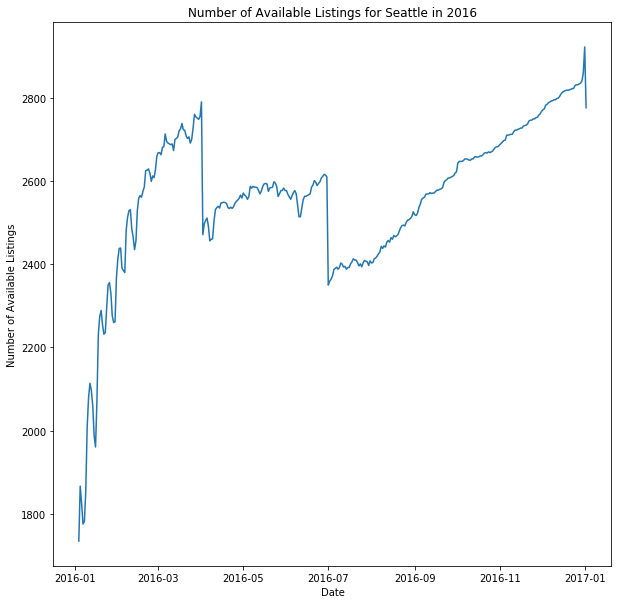

In [8]:
fig_num_listings_by_date = plt.figure(figsize = (10, 10))
plt.plot(cal_by_datetime.datetime.dt.to_pydatetime(), cal_by_datetime['is_available'])
plt.xlabel('Date')
plt.ylabel('Number of Available Listings')
plt.title('Number of Available Listings for Seattle in 2016')
plt.show()

In [9]:
lis_by_neighbourhood = lis.groupby(['neighbourhood_cleansed'], as_index = False).count()

lis_by_neighbourhood

,neighbourhood_cleansed,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Adams,70,70,70,70,70,68,63,70,57,...,57,57,57,57,70,70,70,70,70,57
1,Alki,42,42,42,42,42,39,36,42,28,...,28,28,28,28,42,42,42,42,42,29
2,Arbor Heights,5,5,5,5,5,5,5,5,4,...,3,3,3,3,5,5,5,5,5,3
3,Atlantic,53,53,53,53,53,47,42,53,36,...,42,42,42,42,53,53,53,53,53,43
4,Belltown,234,234,234,234,234,220,200,234,146,...,203,203,203,203,234,234,234,234,234,203
5,Bitter Lake,13,13,13,13,13,13,10,13,8,...,12,12,12,12,13,13,13,13,13,12
6,Briarcliff,14,14,14,14,14,14,12,14,12,...,12,12,12,12,14,14,14,14,14,12
7,Brighton,13,13,13,13,13,13,12,13,11,...,11,11,11,11,13,13,13,13,13,11
8,Broadview,17,17,17,17,17,16,14,17,15,...,16,16,16,16,17,17,17,17,17,16
9,Broadway,397,397,397,397,397,363,323,397,266,...,321,321,321,321,397,397,397,397,397,323


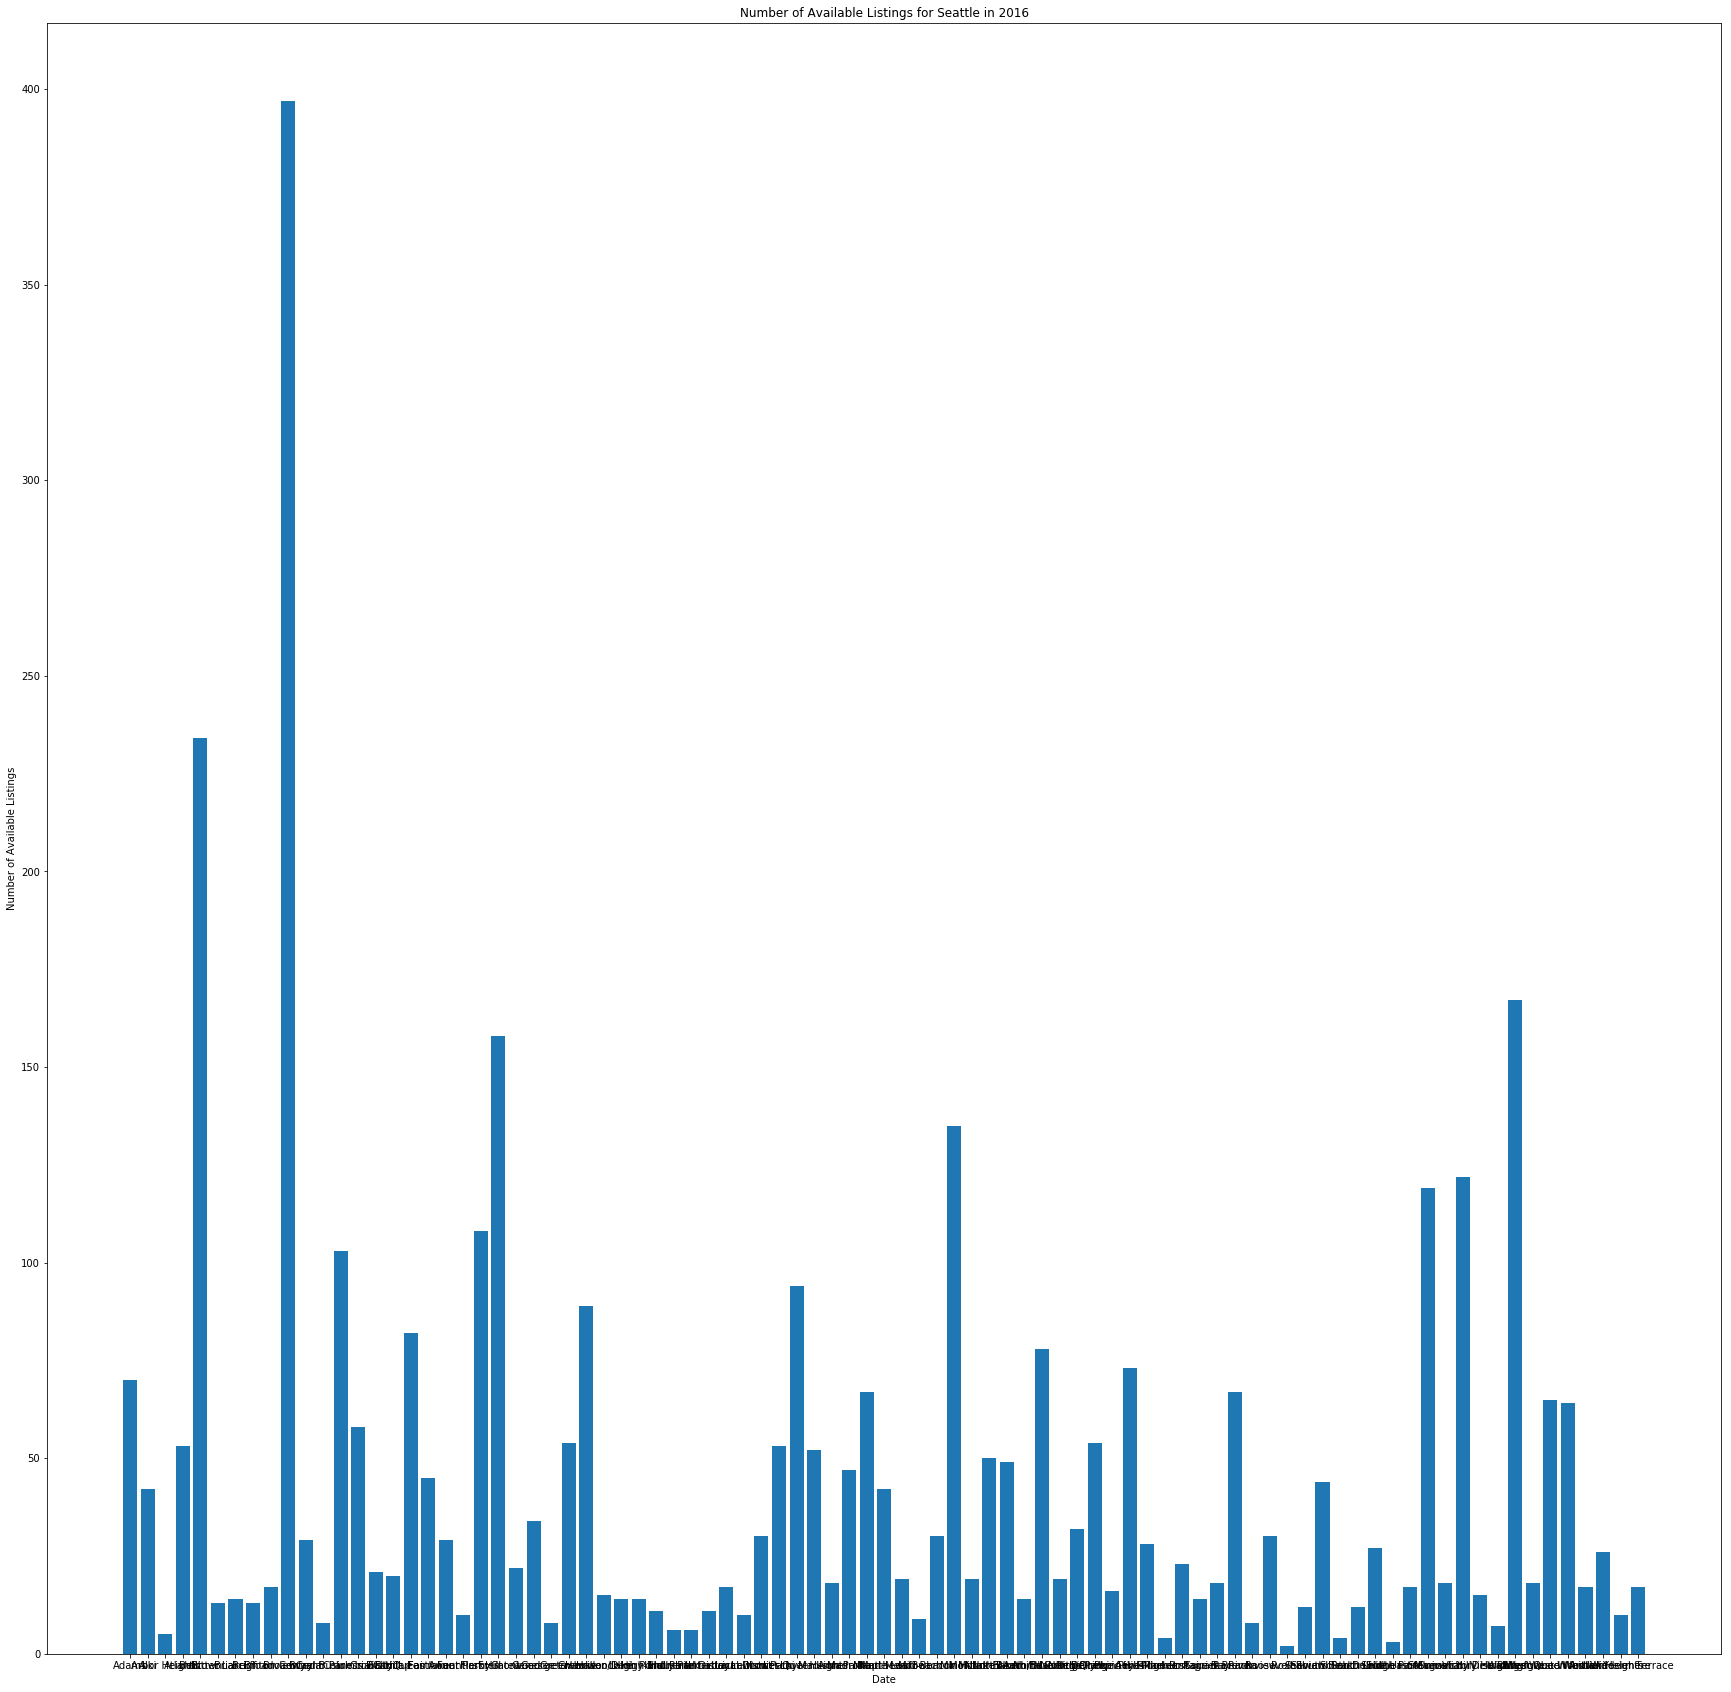

In [10]:
fig_num_listings_by_neighbourhood = plt.figure(figsize = (30, 30))
plt.bar(lis_by_neighbourhood['neighbourhood_cleansed'], lis_by_neighbourhood['id'])
plt.xlabel('Date')
plt.ylabel('Number of Available Listings')
plt.title('Number of Available Listings for Seattle in 2016')
plt.show()

In [11]:
# Create geometry column for listings
geometry = [Point(xy) for xy in zip(lis['longitude'], lis['latitude'])]
crs = {'init': 'epsg:4326'}
lis = gpd.GeoDataFrame(lis, crs = crs, geometry = geometry)

In [12]:
# From https://data.seattle.gov/Land-Base/2010-US-Census-Blocks/46cb-j9zb
# Create background map of Seattle
shp = gpd.GeoDataFrame.from_file('data/raw/2010_US_Census_Blocks.shp')

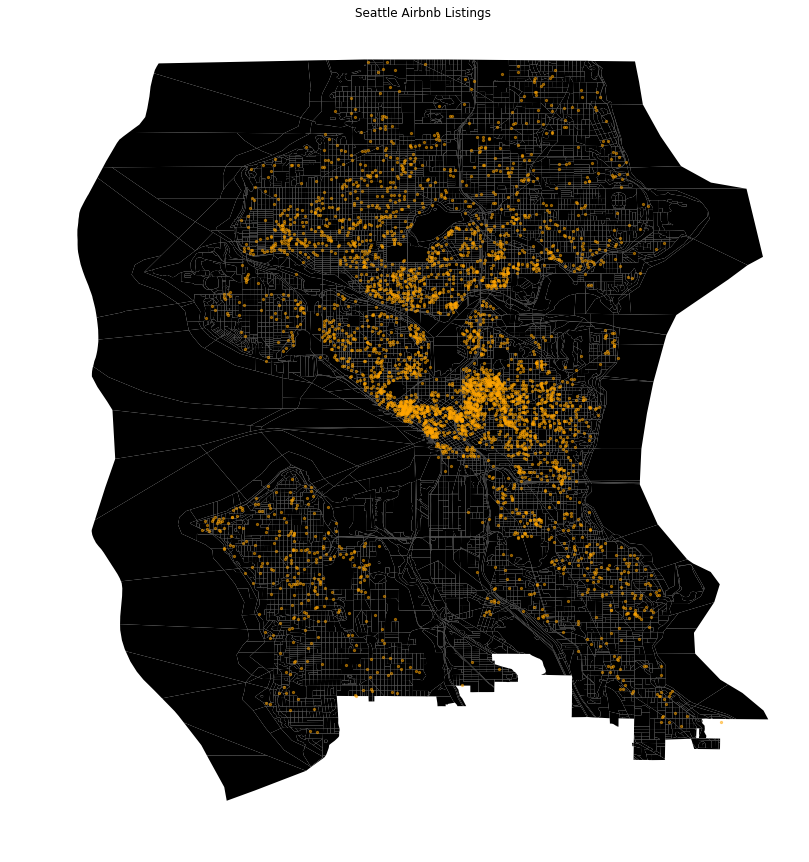

In [13]:
# Map of Seattle Airbnb Listings
fig_map_seattle_listings, ax = plt.subplots(figsize = (15, 15))
base = shp.plot(ax = ax, color = 'black')
lis.plot(ax = base,
         marker = 'o',
         color = 'orange',
         markersize = 5,
         alpha = 0.5)
_ = ax.axis('off')
plt.title('Seattle Airbnb Listings')
plt.show()

In [14]:
# Generate color gradient
violet = Color('violet')
violet_to_indigo = list(violet.range_to(Color('indigo'), 6))

violet_to_indigo

[<Color violet>,
 <Color #e054ed>,
 <Color #cc23ee>,
 <Color #a30bd6>,
 <Color #7404ad>,
 <Color indigo>]

In [15]:
# Convert price 
lis['price_int'] = lis.price[1:]
lis['price_int'] = lis.price.apply(lambda x: int(float(x[1:].replace(',', ''))))

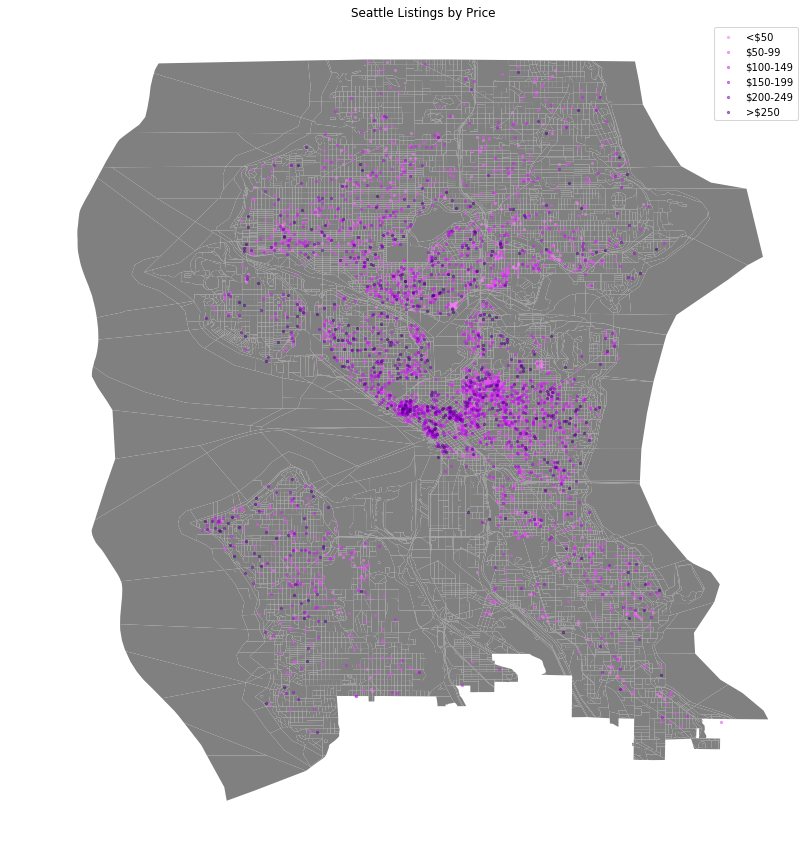

In [16]:
fig_map_seattle_listings_price, ax = plt.subplots(figsize = (15, 15))
base = shp.plot(ax = ax, color = 'grey')
lis[lis.price_int <= 50].plot(ax = base,
                              marker = 'o',
                              color = 'violet',
                              markersize = 5,
                              alpha = 0.5,
                              label = '<$50')
lis[(lis.price_int > 50) & (lis.price_int < 100)].plot(ax = base,
                                                       marker = 'o',
                                                       color = '#e054ed',
                                                       markersize = 5,
                                                       alpha = 0.5,
                                                       label = '$50-99')
lis[(lis.price_int >= 100) & (lis.price_int < 150)].plot(ax = base,
                                                         marker = 'o',
                                                         color = '#cc23ee',
                                                         markersize = 5,
                                                         alpha = 0.5,
                                                         label = '$100-149')
lis[(lis.price_int >= 150) & (lis.price_int < 200)].plot(ax = base,
                                                         marker = 'o',
                                                         color = '#a30bd6',
                                                         markersize = 5,
                                                         alpha = 0.5,
                                                         label = '$150-199')
lis[(lis.price_int >= 200) & (lis.price_int < 250)].plot(ax = base,
                                                         marker = 'o',
                                                         color = '#7404ad',
                                                         markersize = 5,
                                                         alpha = 0.5,
                                                         label = '$200-249')
lis[(lis.price_int >= 250)].plot(ax = base,
                                 marker = 'o',
                                 color = 'indigo',
                                 markersize = 5,
                                 alpha = 0.5,
                                 label = '>$250')



_ = ax.axis('off')
plt.title('Seattle Listings by Price')
plt.legend()
plt.show()

In [17]:
print('Less than $50: ' + str(lis[lis.price_int < 50].count()[0]))
print('$50 - $99: ' + str(lis[(lis.price_int >= 50) & (lis.price_int < 100)].count()[0]))
print('$100 - $149: ' + str(lis[(lis.price_int >= 100) & (lis.price_int < 150)].count()[0]))
print('$150 - $199: ' + str(lis[(lis.price_int >= 150) & (lis.price_int < 200)].count()[0]))
print('$200 - $249: ' + str(lis[(lis.price_int >= 200) & (lis.price_int < 250)].count()[0]))
print('Greater than $250: ' + str(lis[(lis.price_int >= 250)].count()[0]))

Less than $50: 279
$50 - $99: 1522
$100 - $149: 976
$150 - $199: 510
$200 - $249: 208
Greater than $250: 323


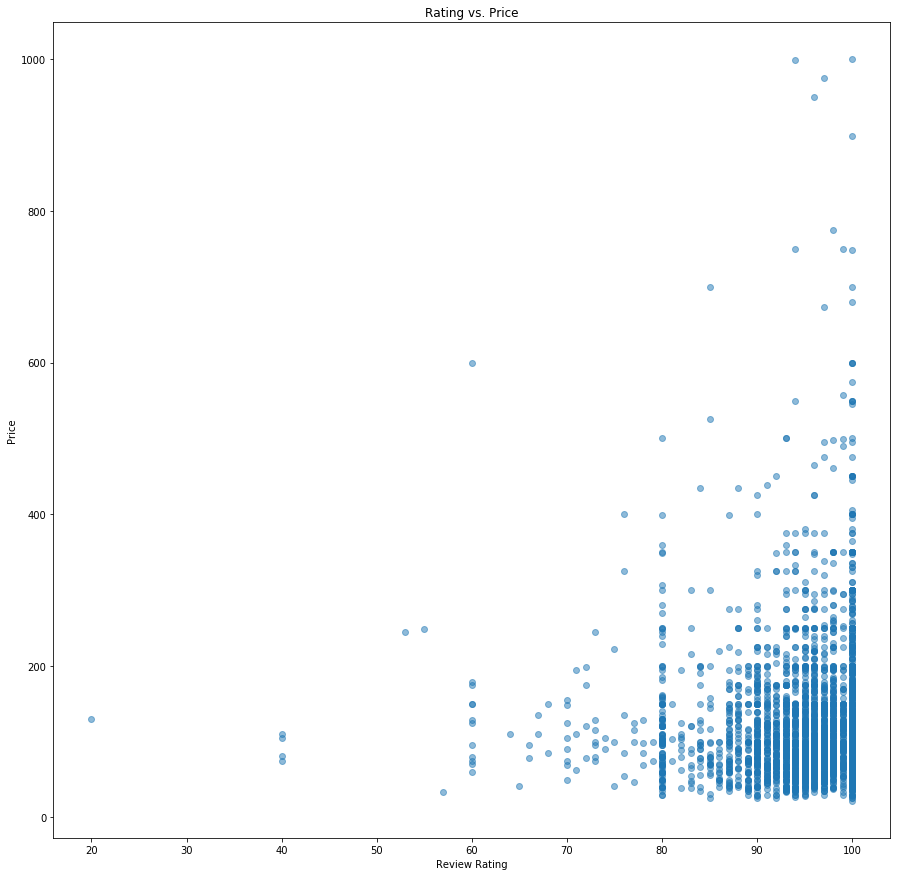

In [52]:
# Graph of review rating vs. price
plt.figure(figsize = (15, 15))
plt.scatter(lis.review_scores_rating, lis.price_int, alpha = 0.5)
plt.xlabel('Review Rating')
plt.ylabel('Price')
plt.title('Rating vs. Price')
plt.show()

In [44]:
lis.amenities[0].count(',')

9

In [54]:
lis.amenities[0]

'{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}'

In [45]:
lis['amenities_count'] = lis.amenities.apply(lambda x: x.count(',') + 1)
#cal['datetime'] = cal.date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

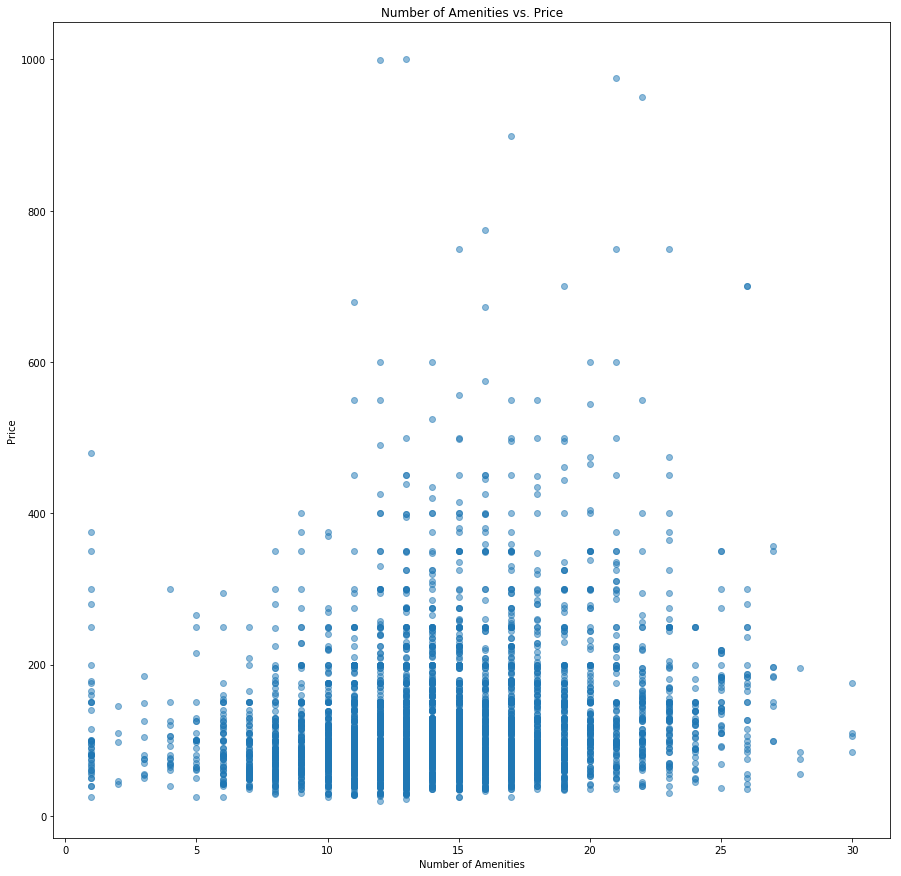

In [51]:
# Graph of number of amenities vs. price
fig_num_amenities_vs_price = plt.figure(figsize = (15, 15))
plt.scatter(lis.amenities_count, lis.price_int, alpha = 0.5)
plt.xlabel('Number of Amenities')
plt.ylabel('Price')
plt.title('Number of Amenities vs. Price')
plt.show()

In [57]:
lis.groupby(lis.zipcode).count()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,...,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,geometry,price_int,amenities_count
zipcode,,,,,,,,,,,,,,,,,,,,,
98101,201,201,201,201,201,200,174,201,136,108,...,172,201,201,201,201,201,172,201,201,201
98102,339,339,339,339,339,306,277,339,227,184,...,272,339,339,339,339,339,274,339,339,339
98103,394,394,394,394,394,380,354,394,320,248,...,328,394,394,394,394,394,336,394,394,394
98104,95,95,95,95,95,93,74,95,56,45,...,79,95,95,95,95,95,81,95,95,95
98105,225,225,225,225,225,221,187,225,167,146,...,174,225,225,225,225,225,179,225,225,225
98106,58,58,58,58,58,54,55,58,49,42,...,51,58,58,58,58,58,51,58,58,58
98107,180,180,180,180,180,176,157,180,137,105,...,152,180,180,180,180,180,152,180,180,180
98108,56,56,56,56,56,54,50,56,39,35,...,48,56,56,56,56,56,48,56,56,56
98109,202,202,202,202,202,193,147,202,136,79,...,159,202,202,202,202,202,162,202,202,202
